In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def model(x, c):
    n_dim = len(c)
    y = np.zeros(len(x))
    for i in range(n_dim):
        y += c[i] * (x**i)
    return y
        
def loglike(x_obs, y_obs, y_sigma_obs, params):
    y_model = model(x_obs, params)
    d = -0.5 * ((y_model - y_obs)/y_sigma_obs)**2
    norm = np.sqrt(2.0 * np.pi * y_sigma_obs **2)
    return np.sum(d - np.log(norm))

def evidence(x_obs, y_obs, y_sigma_obs, n_dim=1, N = 100000):
    params = np.random.random(N * n_dim) * 2.0 - 1.0
    params = np.reshape(params, [N, n_dim])
    loglike_params = np.zeros(N)
    for i in range(N):
        loglike_params[i] = loglike(x_obs, y_obs, y_sigma_obs, params[i,:])
    
    e = np.exp(loglike_params)    
    return np.mean(e)

Text(0,0.5,'y')

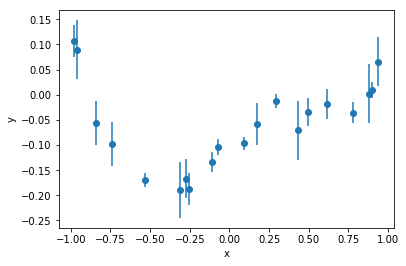

In [7]:
data = np.loadtxt('../ejercicios/data/fitting.txt')
x_obs = data[:,0]
y_obs = data[:,1]
y_sigma_obs = data[:,2]
plt.errorbar(x_obs, y_obs, y_sigma_obs, fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [8]:
n_dims = 21
e = np.zeros(n_dims)
for i in range(n_dims):
    e[i] = evidence(x_obs, y_obs, y_sigma_obs, n_dim=i+1)
    print(e[i])

1.35641413496e-22
2.10736574182e-12
7.63760199148e-05
1354.34908065
142312833.482
1208624.10728
1.17554570314
2.0457534779e-18
1.55202104897e-13
8.3319852082e-07
0.0140407279756
5.50351887493e-06
3.10700124821e-13
1.32328344005e-11
5.84233215871e-26
1.84484327939e-19
5.36236258726e-07
1.20527268972e-19
0.203841796287
0.0265893691183
6.53351127615e-15


(0, 20)

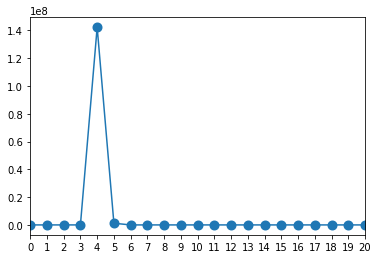

In [10]:
#plt.vlines(range(n_dims), np.zeros(n_dims), np.log10(e), linewidth=4)
plt.scatter(range(n_dims),(e), linewidth=4)
plt.plot(range(n_dims),(e))
_ = plt.xticks(np.linspace(0,20,21))
plt.xlim([0,20])